# Homework 2 APMTH 207
## Author : Elie Attias
### G1 Computational Science and Engineering SM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
from scipy.stats import cauchy
import scipy.stats as st
import os
# os.getcwd()  


# Question 1: Stochastic simulations of an epidemic model

## a) Stochastic Simulation

In [2]:
N = 1000
beta = 0.5
mu = 0.05
gamma = 0.05 
t_end = 150
M = 10
time = np.linspace(0, t_end, t_end + 1)

In [3]:
def SSA(N, M, beta, mu, gamma, t_end = 150, s0 = int(0.975*N),i0 =  int(0.025*N)):
    k1 = beta/N
    k2 = mu
    k3 = gamma
    steps = []
    SS, EE, II, RR, TT = [],[],[],[], []
    for j in range(M):
        s = s0
        e = 0
        i = i0
        r = 0
        t = 0
        step = 0
        S, E, I, R, T,  = [],[],[],[],[]

        while True:
            step += 1
            S.append(s)
            E.append(e)
            I.append(i)
            R.append(r)
            T.append(t)

            a1 = k1* s * i if s*i  > 0 else 0
            a2 = k2 * e if e > 0 else 0
            a3 = k3 * i if i > 0 else 0
            a0 = a1 + a2 + a3

            if a0 <= 0:
                T.append(t_end)
                S.append(s)
                E.append(e)
                I.append(i)
                R.append(r)
                break

            t += random.expovariate(a0)
            if t > t_end:
                break

            u = random.uniform(0, a0)

            if u < a1 :
                e += 1
                s -= 1

            elif u < a1 + a2 :
                i += 1
                e -= 1

            else :
                i -= 1
                r += 1
        axs[0, 0].plot(T, S, alpha = 1, linewidth = 0.4, c = 'lightblue')
        axs[0, 1].plot(T, E,alpha = 1, linewidth = 0.4, c ='navajowhite')
        axs[1, 0].plot(T, I,alpha = 1, linewidth = 0.4, c ='lightgreen')
        axs[1, 1].plot(T, R,alpha = 1, linewidth = 0.4, c = 'coral')
        
        steps.append(step)
        SS.append(S)
        EE.append(E)
        II.append(I)
        RR.append(R)
    return SS, EE, II, RR, TT, np.mean(steps)

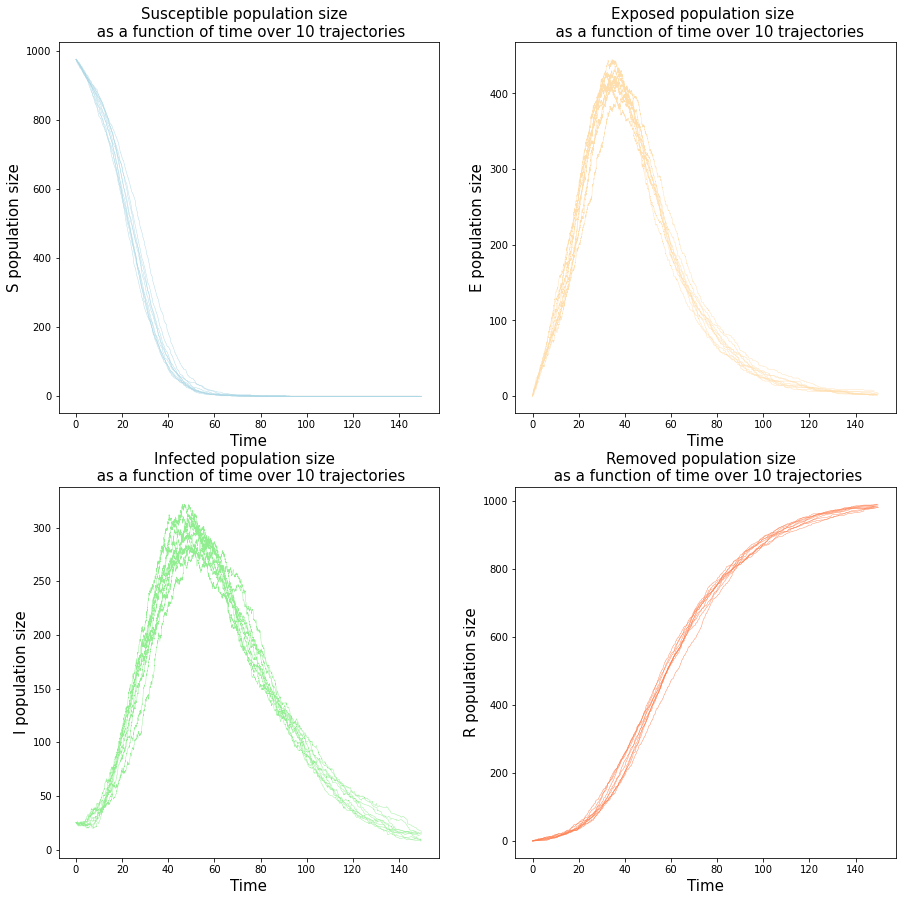

In [4]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

S, E, I, R, T,  _ = SSA(N,M, beta, mu, gamma)

axs[0,0].set_xlabel('Time', fontsize = 15)
axs[0,0].set_ylabel('S population size', fontsize = 15)
axs[0,0].set_title(f'Susceptible population size  \n as a function of time over {M} trajectories', fontsize = 15)

axs[0,1].set_xlabel('Time', fontsize = 15)
axs[0,1].set_ylabel('E population size', fontsize = 15)
axs[0,1].set_title(f'Exposed population size \n  as a function of time over {M} trajectories', fontsize = 15)

axs[1,0].set_xlabel('Time', fontsize = 15)
axs[1,0].set_ylabel('I population size', fontsize = 15)
axs[1,0].set_title(f'Infected population size  \n as a function of time over {M} trajectories', fontsize = 15)

axs[1,1].set_xlabel('Time', fontsize = 15)
axs[1,1].set_ylabel('R population size', fontsize = 15)
axs[1,1].set_title(f'Removed population size  \n as a function of time over {M} trajectories', fontsize = 15)

plt.show()

## b) Master Equation




Let's derive the master equation for the above process.

The Stochiometric matrix encompassing the three reactions is: 
$$
N = \begin{matrix}
-1 & 0 & 0\\
1 & -1 & 0\\
0 & 1 & -1\\
0 & 0 & 1
\end{matrix}
$$
where the columns are reactions and the rows correspond to population compartments in the SEIR, in the order : S, E, I, R. The master equation is : 
$$
\begin{equation}
    \begin{split}
        \frac{\partial p({x}, t)}{\partial t} &= \sum_j [w_j(x - N_j)p(x - N_j) - w_j(x)p(x)]\\ 
    \end{split}
\end{equation}
$$

Where we denote by $x(t) = [s(t), e(t), i(t), r(t)]^T$ a state of the population at time $t$, $N_j$ the $j^{th}$ column of $N$, $w_j$ the propensities of each reaction with $w_1(x) = \frac{\beta}{N}SI$, $w_2(x) = \mu E$ and $w_3(x) = \gamma I$.  We do not write 
$t$ in the arguments of $p$ and we assume that $p$ is zero if any of the populations
of $x - N_j$ is negative.  To get the evolution of the expected size of the population $x_i(t)$ where $x_1(t) = s(t), x_2(t) = e(t), x_3(t) = i(t), x_4(t) = r(t)$, we sum over all the states from $[0,0,0,0]^T$ to $[\infty, \infty, \infty, \infty]^T$:


$$
\begin{equation}
    \begin{split}
    \frac{d<X_i>(t)}{dt} &= \sum_{x}x_i\frac{\partial p(x)}{\partial t}\\
    & = \sum_{j}\sum_{x}[x_i w_j(x - N_j)p(x - N_j) - x_iw_j(x)p(x)]\\
    & =  \sum_{j}\sum_{x} [(x_i + N_{ij})w_j(x)p(x) - x_iw_j(x)p(x)]\\
    & = \sum_{j}N_{ij}\sum_xw_j(x)p(x)\\
    & = \sum_{j}N_{ij}< w_j >
    \end{split}
\end{equation}
$$

In  the third, equality, we used the change of variable in the summation : $x' = x - N_j$. The last expression is  a sum of the expectation of the propensity weighted by the stoichiometric coefficients of each reaction (-1, 0, 1) depending  on the considered population. 

Hence, this gives that : 


$$\frac{d<X_1>(t)}{dt} = \frac{d<S>(t)}{dt} = N_{11}<{w_1}>=  - \frac{\beta}{N}S(t)I(t)$$
$$\frac{d<X_2>(t)}{dt} = \frac{d<E>(t)}{dt} = N_{12}<{w_1}> + N_{22}<{w_2}> = \frac{\beta}{N}S(t)I(t) - \mu E(t) $$
$$\frac{d<X_3>(t)}{dt} = \frac{d<I>(t)}{dt} = N_{32}<{w_2}> + N_{33}<{w_3}>  = \mu E(t) - \gamma I(t)$$
$$ \frac{d<X_4>(t)}{dt} = \frac{d<R>(t)}{dt} = N_{43}<{w_3}> =  \gamma I(t)$$

Indeed, we recover that $\sum_{i}\frac{d<X_i>(t)}{dt} = 0$ meaning that the overall population size does not change in time. 

Expressing each population  as $X = \mathbb{E}[X] + \delta X$ where $\mathbb{E}[\delta X] = 0$, we obtain a set of differential equations for the expectation values of the compartments. 


We derive from the previous equations the four following ordinary differential equations.  

$$\frac{d\mathbb{E}[R](t)}{dt} =  \gamma I(t) $$

$$\frac{d\mathbb{E}[S](t)}{dt} =  -\frac{\beta}{N}I(t)S(t) $$

$$\frac{d\mathbb{E}[E](t) }{dt} =  \frac{\beta}{N}I(t)S(t) - \mu E$$

$$
\frac{d\mathbb{E}[I](t)}{dt}=  \mu E(t) - \gamma I(t) $$

Let us study the equilibrium of our system. To do so, we equate the vector state change : $[\frac{d\mathbb{E}[S](t)}{dt}, \frac{d\mathbb{E}[E](t)}{dt}, \frac{d\mathbb{E}[I](t)}{dt}, \frac{d\mathbb{E}[R](t)}{dt}]^T$ to $0$, and look for solutions : $X_{eq} = [S^*, E^*, I^*, R^*]^T$. 



$$\frac{d\mathbb{E}[R](t)}{dt} =  \gamma I(t) = 0\implies I^* = 0$$

$$\frac{d\mathbb{E}[S](t)}{dt} =  -\frac{\beta}{N}I(t)S(t) \implies I^*S^* = 0$$

$$\frac{d\mathbb{E}[E](t) }{dt} =  \frac{\beta}{N}I(t)S(t) - \mu E= 0 \implies \frac{\beta}{N}I^*S^* = \mu E^*  \implies E^* = 0$$

$$
\frac{d\mathbb{E}[I](t)}{dt}=  \mu E(t) - \gamma I(t) = 0 \implies \mu E^* - \gamma I^* = 0$$






 The first equation gives us that $I^* = 0$. The second equation does not give us any information on $S^*$. The third equation gives us that $E^* = 0$. However, the fact that we don't have any fixed equilibrium points for $S^*$ and $R^*$ suggests that we can have different regimes of equilibria. 

Indeed, as shown in the plots of question c, either the whole population is removed and $R^* = N$ and $S^* = 0$, or we have an in between regime where $R^* < N$ and $S^* >0$.

## c) Solving ODE numerically

Let us now solve the ODE numerically and compare the solution to the stochastic simulations

In [5]:
N = 1000

beta = 0.5
mu = 0.05

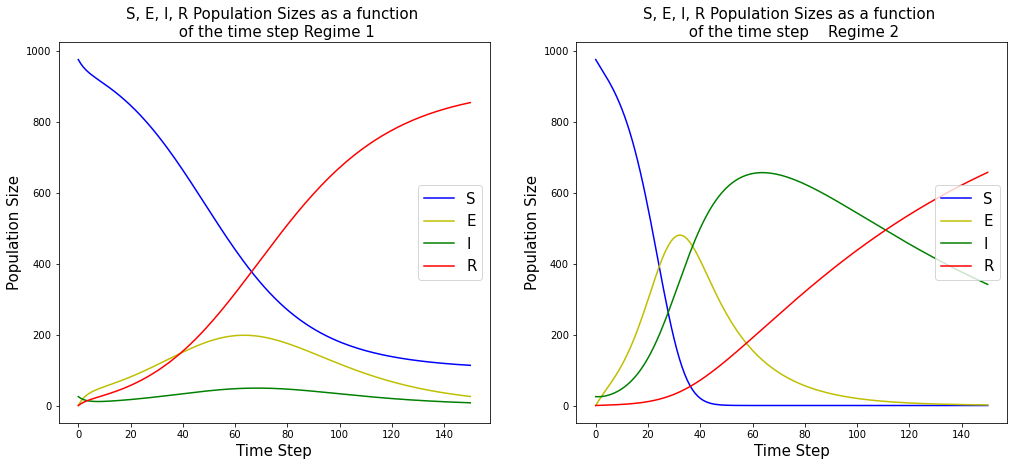

In [6]:
gamma1 = 0.2  #example of regime where S[final] > 0
gamma2 = 0.01 # example of regime where S[final] = 0


def SEIR_numeric(N, M ,beta, mu, gamma, t_end, i0, s0):
    s = s0
    e = 0
    i = i0
    r = 0
    t = 0
    dt = 1 # 1 day passes
    S = [s]
    E = [e]
    I = [i]
    R = [r]
    T = [t]
    while t < t_end:
        S.append(S[t]- dt * beta*I[t]*S[t]/N)
        E.append(E[t] +  dt *beta*I[t]*S[t]/N - dt *mu*E[t])
        I.append(I[t] + dt *mu*E[t] - dt *gamma*I[t])
        R.append(R[t] + dt * gamma*I[t])
        t +=1
        T.append(t)
    return S, E, I, R, T

S1, E1, I1, R1, T1 = SEIR_numeric(N, M, beta, mu, gamma1, t_end, int(0.025*N), N - int(0.025*N))
S2, E2, I2, R2, T2 = SEIR_numeric(N, M, beta, mu, gamma2, t_end, int(0.025*N), N - int(0.025*N))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(17)

ax1.plot(T1, S1, c = 'b', label = 'S')
ax1.plot(T1, E1,  c = 'y', label = 'E')
ax1.plot(T1, I1,  c = 'green', label = 'I')
ax1.plot(T1, R1,  c = 'r', label = 'R')

ax2.plot(T2, S2, c = 'b', label = 'S')
ax2.plot(T2, E2 , c = 'y', label = 'E')
ax2.plot(T2, I2,  c = 'green', label = 'I')
ax2.plot(T2, R2,  c = 'r', label = 'R')

ax1.legend(loc = 'center right', fontsize = 15)
ax2.legend(loc = 'center right', fontsize = 15)
ax1.set_xlabel(f'Time Step', fontsize = 15)
ax2.set_xlabel(f'Time Step', fontsize = 15)

ax1.set_ylabel('Population Size' , fontsize = 15)
ax2.set_ylabel(f'Population Size' , fontsize = 15)

ax1.set_title(f'S, E, I, R Population Sizes as a function \n of the time step Regime 1', fontsize = 15)
ax2.set_title(f'S, E, I, R Population Sizes as a function \n of the time step    Regime 2', fontsize = 15)
plt.show()

In [7]:
print(f'Regime 1: gamma = {gamma1}, we obtain a final susceptible population of around 118 people, and final recovered of : {int(R1[-1])}')
print(f'Regime 2: gamma  = {gamma2}, we obtain a final susceptible population of 0 people, and final recovered people of : {int(R2[-1])}')

Regime 1: gamma = 0.2, we obtain a final susceptible population of around 118 people, and final recovered of : 853
Regime 2: gamma  = 0.01, we obtain a final susceptible population of 0 people, and final recovered people of : 657


* Analysis 1: There are two distinct equilibria depending on the value of gamma

We can see that in the first regime (gamma = 0.4), there are still some susceptible people remaining at the end of the simulation, whereas in the second regime (gamma = 0.1), there are no susceptible people left and the overal population has recovered from the disease. Indeed, this makes sense as gamma represents the rate at which infected people recover. This regime is also observed in the simulations as shown in the below plot for gamma = 0.25.

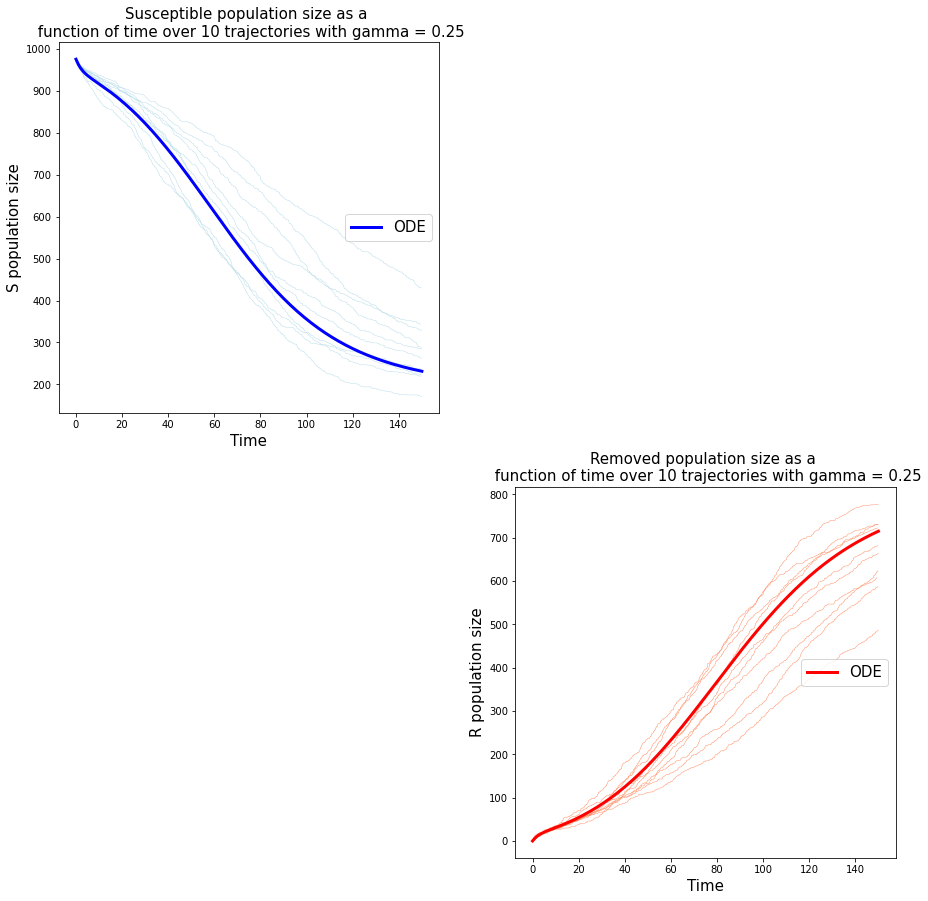

In [8]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(15) 
gamma = 0.25
M = 10
N = 1000
i0= int(0.025*N)
s0 = int(0.975*N)

beta = 0.5
mu = 0.05
S, E, I, R, T, _ = SSA(N, M, beta , mu, gamma)
S1, E1, I1, R1, T1 = SEIR_numeric(N, M, beta, mu, gamma, t_end, int(0.025*N), int(0.975*N))

axs[0,0].plot(T1, S1, c = 'b', label = 'ODE', linewidth = 3)
axs[1,1].plot(T1, R1,  c = 'r', label = 'ODE', linewidth = 3)
axs[0,0].legend(loc = 'center right', fontsize = 15)
axs[1,1].legend(loc = 'center right', fontsize = 15)

axs[0,0].set_xlabel('Time', fontsize = 15)
axs[0,0].set_ylabel('S population size', fontsize = 15)
axs[0,0].set_title(f'Susceptible population size as a \n function of time over {M} trajectories with gamma = {gamma}', fontsize = 15)


axs[1,1].set_xlabel('Time', fontsize = 15)
axs[1,1].set_ylabel('R population size', fontsize = 15)
axs[1,1].set_title(f'Removed population size as a \n function of time over {M} trajectories with gamma = {gamma}', fontsize = 15)

fig.delaxes(axs[0,1])
fig.delaxes(axs[1,0])
plt.show()

* Analysis 2: It seems that there is an offset between between our solution to the ODE and the mean of our stochastic simulations.

Indeed, as the numerical solution solves for the expectation of our population compartments: i.e $\mathbb{E}[X]$, we have that our stochastic simulations reveal the offset $\delta X$ present in the formulation $X = \mathbb{E}[X] + \delta X$. This offset is a marker of real world variations, and seeing that our stochastic simulation can reveal it shows the power of stochastic analysis in understanding the world !

* Analysis 3: The size of N introduces a delay in the time need to reach an equillibrium

Indeed, as shown in the plots below, as N increases, it takes more time for each compartments to reach their equilibrium. We also notice that their change in time have larger magnitude as N increases. Indeed, epidemics propagate much faster in smaller populations than in larger ones. 

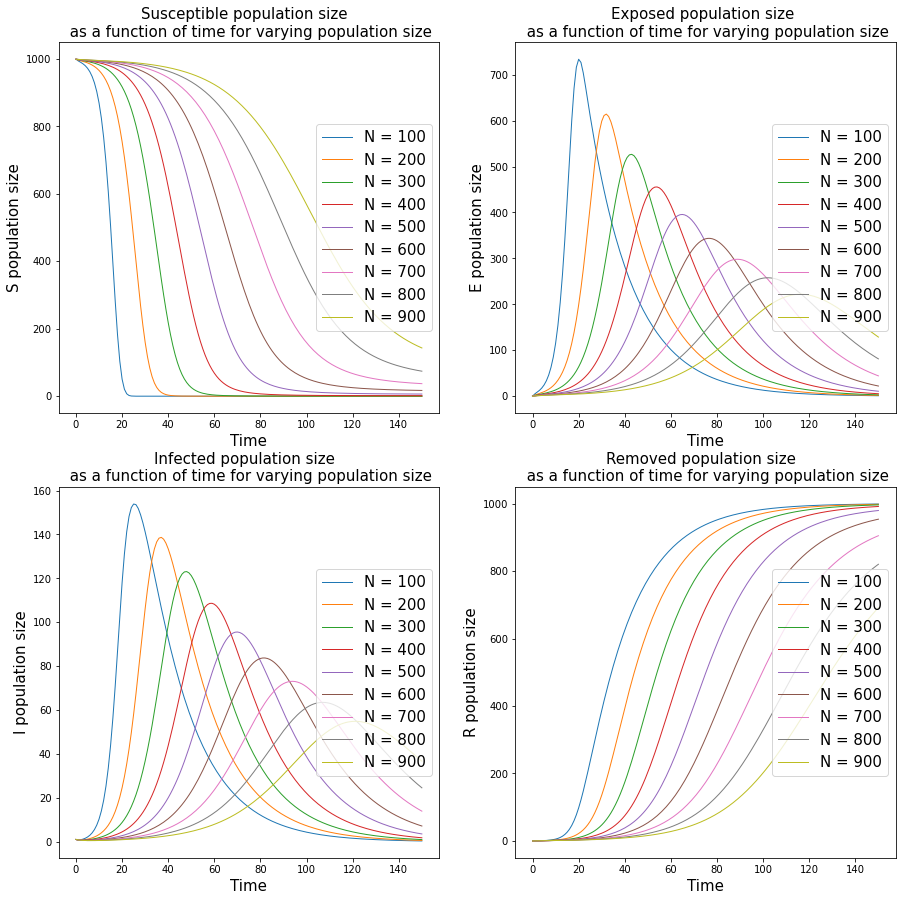

In [9]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(15) 
for n in range(100, 1000, 100):
    S_num, E_num, I_num, R_num, T_num = SEIR_numeric(n, M, beta, mu, gamma1, t_end, 1, N - 1)
    axs[0, 0].plot(T_num, S_num, alpha = 1, linewidth = 1, label = f'N = {n}')
    axs[0, 1].plot(T_num, E_num, alpha = 1, linewidth = 1, label = f'N = {n}')
    axs[1, 0].plot(T_num, I_num, alpha = 1, linewidth = 1, label = f'N = {n}')
    axs[1, 1].plot(T_num, R_num, alpha = 1, linewidth = 1, label = f'N = {n}')

axs[0,0].set_xlabel('Time', fontsize = 15)
axs[0,0].set_ylabel('S population size', fontsize = 15)
axs[0,0].set_title(f'Susceptible population size  \n as a function of time for varying population size', fontsize = 15)
axs[0,0].legend(loc = 'center right', fontsize = 15)

axs[0,1].set_xlabel('Time', fontsize = 15)
axs[0,1].set_ylabel('E population size', fontsize = 15)
axs[0,1].set_title(f'Exposed population size \n as a function of time for varying population size', fontsize = 15)
axs[0,1].legend(loc = 'center right', fontsize = 15)

axs[1,0].set_xlabel('Time', fontsize = 15)
axs[1,0].set_ylabel('I population size', fontsize = 15)
axs[1,0].set_title(f'Infected population size  \n as a function of time for varying population size', fontsize = 15)
axs[1,0].legend(loc = 'center right', fontsize = 15)

axs[1,1].set_xlabel('Time', fontsize = 15)
axs[1,1].set_ylabel('R population size', fontsize = 15)
axs[1,1].set_title(f'Removed population size  \n as a function of time for varying population size', fontsize = 15)
axs[1,1].legend(loc = 'center right', fontsize = 15)

plt.show()

## d) Comparison with SSA

The numerical solution to the ODEs and the stochastic simulation give very similar results. We can clearly see how that the ODE's numerical solution corresponds to the average of all stochastic simulations - as proven by the master equation. 

We also find that some stochastic simulations converge faster or slower to the equilibrium compared to the ODE's nmerical solution. This is due to the randomness involved in the stochastic simulations, which introduce variations at every bootstrap. 

Finally, we note that the stochastic simulations reveal several different possible scenarios. Indeed, in rare iterations, we find that after 1 time step, all infecious people I have recovered, which entails a quick convergence to an equilibrium where : $S^* = S_0 = N - 1, E^* = E_0 = 0, I^* = 0, R^* = 1$, whereas the numerical solution do not show the possibility of this scenario. 

In [10]:
N = 2000
M = 50
mu = 0.05
gamma = 0.05
i0 = 1
beta = 0.5
s0 = N - i0
M = 50
N = 2000


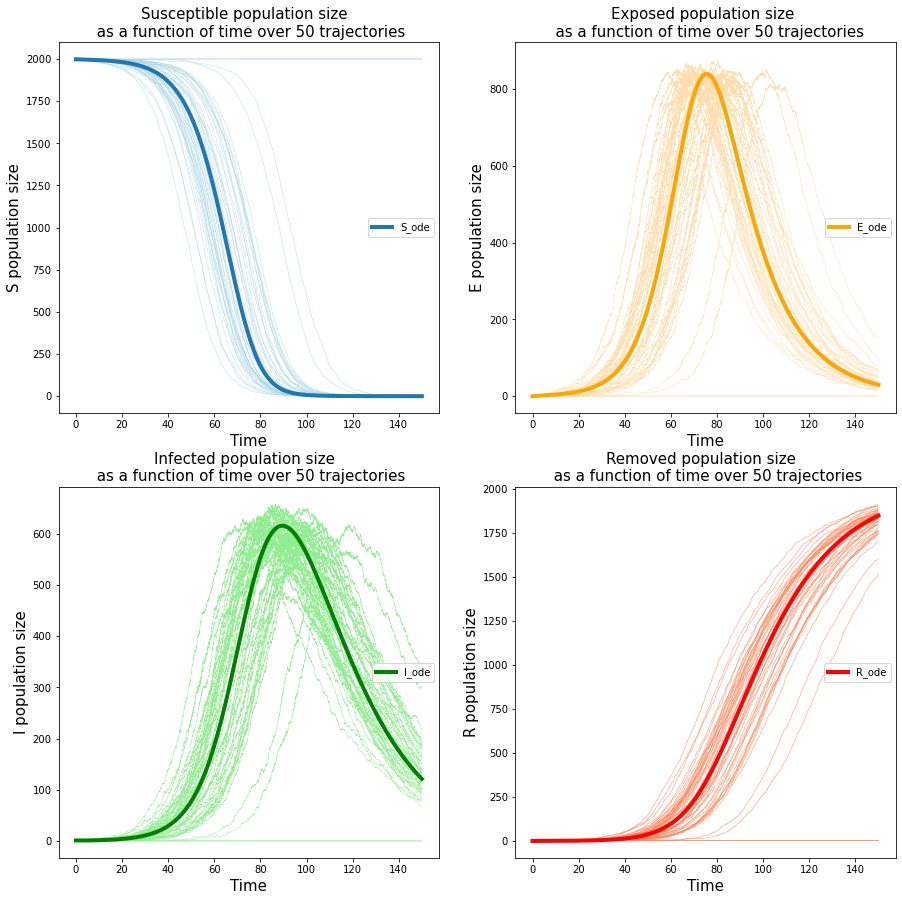

In [11]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

S, E, I, R, T, _ = SSA(N = N, M = M,  beta = beta, mu = mu, gamma = gamma, i0 = i0, s0 = N - i0)
S_ode, E_ode, I_ode, R_ode, T_ode = SEIR_numeric(N = N, M = M, beta = beta, mu = mu, gamma = gamma , t_end = 150,i0 = i0, s0 = N - i0)

axs[0,0].plot(T_ode, S_ode, label = 'S_ode', linewidth = 4)
axs[0,0].set_xlabel('Time', fontsize = 15)
axs[0,0].set_ylabel('S population size', fontsize = 15)
axs[0,0].set_title(f'Susceptible population size  \n as a function of time over {M} trajectories', fontsize = 15)
axs[0,0].legend(loc = 'center right')

axs[0,1].plot(T_ode, E_ode, label = 'E_ode', linewidth = 4, color = 'orange')
axs[0,1].set_xlabel('Time', fontsize = 15)
axs[0,1].set_ylabel('E population size', fontsize = 15)
axs[0,1].set_title(f'Exposed population size \n  as a function of time over {M} trajectories', fontsize = 15)
axs[0,1].legend(loc = 'center right')

axs[1,0].plot(T_ode, I_ode, label = 'I_ode', linewidth = 4, color = 'green')
axs[1,0].set_xlabel('Time', fontsize = 15)
axs[1,0].set_ylabel('I population size', fontsize = 15)
axs[1,0].set_title(f'Infected population size  \n as a function of time over {M} trajectories', fontsize = 15)
axs[1,0].legend(loc = 'center right')


axs[1,1].plot(T_ode, R_ode, label = 'R_ode', linewidth = 4, color = 'r')
axs[1,1].set_xlabel('Time', fontsize = 15)
axs[1,1].set_ylabel('R population size', fontsize = 15)
axs[1,1].set_title(f'Removed population size  \n as a function of time over {M} trajectories', fontsize = 15)
axs[1,1].legend(loc = 'center right')
plt.show()

## e) $\tau$ Leaping

In [12]:
def SSA_thau_leaping(N, M, beta, mu, gamma, tau, s0 ,i0 ):
    prop1 = beta/N
    prop2 = mu
    prop3 = gamma
    for j in range(M):
        s, e, i, r, t = s0, 0, i0, 0, 0
        S, E, I, R, T = [],[],[],[],[]
        steps = []
        step = 0
        while True:
            step += 1
            S.append(s)
            E.append(e)
            I.append(i)
            R.append(r)
            T.append(t)

            a1 = prop1 * s * i if s*i  > 0 else 0
            a2 = prop2 * e if e > 0 else 0
            a3 = prop3 * i if i > 0 else 0
            a0 = a1 + a2 + a3

            if a0 <= 0 or t > t_end:
                T.append(t_end)
                S.append(s)
                E.append(e)
                I.append(i)
                R.append(r)
                break
            
            k1 = np.random.poisson(tau*a1)
            k2 = np.random.poisson(tau*a2)
            k3 = np.random.poisson(tau*a3)
            
            if k1 > s:
                k1 = s
                
            s -= k1
            e += k1
            
            if k2 > e:
                k2 = e 
                
            e -=k2
            i += k2
            
            if k3 > i:
                k3 = i 
            
            i -= k3
            r += k3
    
            t += tau

        steps.append(step)
        axs[0, 0].step(T, S, label = f'tau = {tau}', linewidth = 1)
        axs[0, 1].step(T, E, label = f'tau = {tau}', linewidth = 1)
        axs[1, 0].step(T, I, label = f'tau = {tau}', linewidth = 1)
        axs[1, 1].step(T, R, label = f'tau = {tau}', linewidth = 1)
    
    return np.array(S),np.array(E), np.array(I), np.array(R), np.array(T), np.mean(steps)

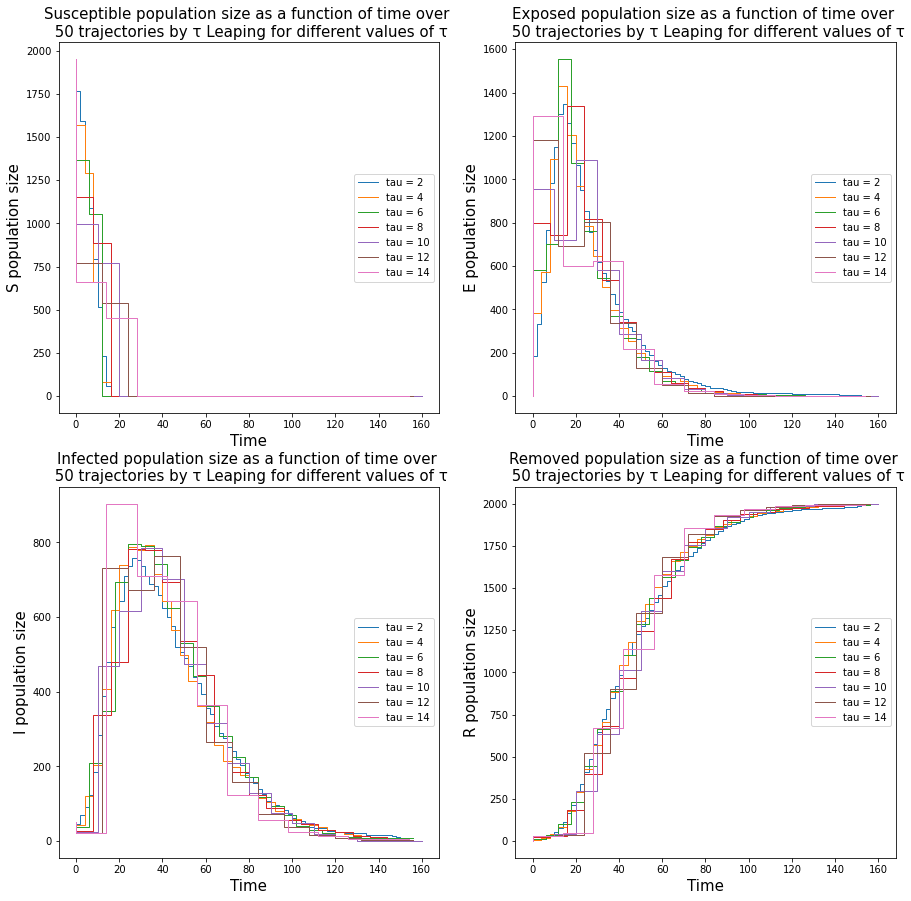

In [13]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

for tau in range(2, 16, 2):
    S, E, I, R, T, average_step= SSA_thau_leaping(N = 500, M = 1, beta = 0.5, mu = 0.05, gamma = 0.05, tau = tau, s0 = int(0.975*N), i0 =  int(0.025*N))

    axs[0,0].set_xlabel('Time', fontsize = 15)
    axs[0,0].set_ylabel('S population size', fontsize = 15)
    axs[0,0].set_title(f'Susceptible population size as a function of time over \n {M} trajectories by \u03C4 Leaping for different values of \u03C4', fontsize = 15)
    axs[0,0].legend(loc = 'center right')

    axs[0,1].set_xlabel('Time', fontsize = 15)
    axs[0,1].set_ylabel('E population size', fontsize = 15)
    axs[0,1].set_title(f'Exposed population size as a function of time over \n {M} trajectories by \u03C4 Leaping for different values of \u03C4', fontsize = 15)
    axs[0,1].legend(loc = 'center right')

    axs[1,0].set_xlabel('Time', fontsize = 15)
    axs[1,0].set_ylabel('I population size', fontsize = 15)
    axs[1,0].set_title(f'Infected population size as a function of time over \n {M} trajectories by \u03C4 Leaping for different values of \u03C4', fontsize = 15)
    axs[1,0].legend(loc = 'center right')

    axs[1,1].set_xlabel('Time', fontsize = 15)
    axs[1,1].set_ylabel('R population size', fontsize = 15)
    axs[1,1].set_title(f'Removed population size as a function of time over \n {M} trajectories by \u03C4 Leaping for different values of \u03C4', fontsize = 15)
    axs[1,1].legend(loc = 'center right')
plt.show()

In [14]:
S, E, I, R, T, average_step_tau= SSA_thau_leaping(N = 500, M = 1, beta = 0.5, mu = 0.05, gamma = 0.05, tau = tau, s0 = int(0.975*N), i0 =  int(0.025*N))
S, E, I, R, T, average_step_regular= SSA(N = 500, M = 1, beta = 0.5, mu = 0.05, gamma = 0.05, s0 = int(0.975*N), i0 =  int(0.025*N))


In [15]:
print(f'The average number of steps taken by tau leaping SSA to over the {M} trajectories to simulate the system is {average_step_tau}')
print(f'The average number of steps taken by regular SSA to over the {M} trajectories to simulate the system is {average_step_regular}')

The average number of steps taken by tau leaping SSA to over the 50 trajectories to simulate the system is 10.0
The average number of steps taken by regular SSA to over the 50 trajectories to simulate the system is 5895.0


In [16]:
print(f'Tau leaping needs {average_step_regular/average_step_tau} times less steps to model our system than regular SSA.')

Tau leaping needs 589.5 times less steps to model our system than regular SSA.


Considering that the tau leaping simulations are relatively close to the ODEs numerical solutions, we can confirm that tau leaping is useful in modelling systems in that it runs fairly faster than SSA and gives a good general overall overview of the system's behaviour.

# Question 2: Symmetric Random Walk
## a) Simulation of M walkers over N steps in d dimensions.

In [17]:
def d_bar(N,M,D):
    '''computes the average distance between each walker and their initial position, at every time step. 
    Returns the corresponding array'''
    distances = []
    X = np.zeros((M, D))
    trajectories = np.zeros((M, N, D))
    for step in range(N):
        for walker in range(M):
            rand_dim = random.randrange(D)
            decision = random.uniform(0, 1)
            if decision>0.5:
                X[walker,rand_dim] += 1
            else: 
                X[walker,rand_dim] -= 1
            trajectories[walker, step] = X[walker]
        distances.append(average_norm(X, M, D))
    return np.array(distances), trajectories

## b) Scaling law 

In order to find the coefficients $a, b$ determining the scaling law of $\bar{d}$ such that $\bar{d} = bn^a$, we will perform a linear regression over the following correspondence:
$$\bar{d} = bn^a \implies \ln(\bar{d}) = \ln(b) + a\ln(n)$$
This way, we will obtain the coefficients $\ln(b), a$ that models linearly $\ln(\bar{d})$. Then, taking the exponential of $\ln(b)$ will bring us back to $b$ which is one of the coefficient we are looking for. 

In [18]:
N = 1000
M = 100
steps = np.linspace(1, N, N)
d2 = 2
d3 = 3

In [19]:
def average_norm(X, M, D):
    distance = np.zeros(M)
    for m in range(M):
        distance[m] = np.sqrt((X[m]**2).sum())
    return sum(distance)/M

def linear_regression(x, y):     
    '''Computes and returns the coefficients of a linear regression'''
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    return (B0, B1)

In [20]:
distances_2, _ = d_bar(N,M,d2)
distances_3, _ = d_bar(N,M,d3)

distances_log_2 = np.log(distances_2)
distances_log_3 = np.log(distances_3)
steps_log = np.log(steps)

b_log_2, a2 = linear_regression(steps_log, distances_log_2)
b_log_3, a3 = linear_regression(steps_log, distances_log_3)

b2 = np.exp(b_log_2)
b3 = np.exp(b_log_3)

fit_2 = np.array([b2*(n**a2) for n in steps])
fit_3 = np.array([b3*(n**a3) for n in steps])

In [21]:
print(f'for d = {2} M = {M}, N ={N}, our linear regression coefficients are b = {b2}, a = {a2}')
print(f'for d = {3} M = {M}, N ={N}, our linear regression coefficients are b = {b3}, a = {a3}')

for d = 2 M = 100, N =1000, our linear regression coefficients are b = 0.7632742052650194, a = 0.523601195870044
for d = 3 M = 100, N =1000, our linear regression coefficients are b = 0.9314287457979313, a = 0.4973877398738527


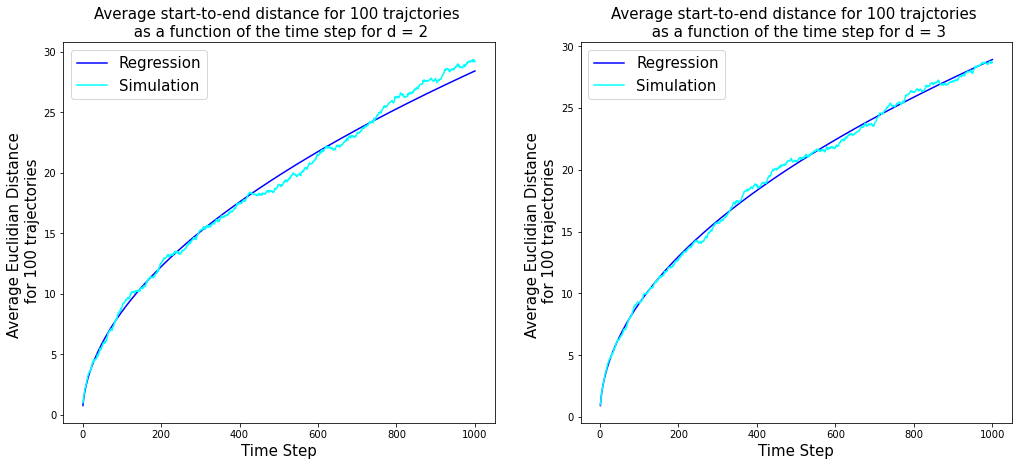

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(17)

ax1.plot(steps,fit_2, label = 'Regression', c = 'b')
ax1.plot(steps,distances_2, label = 'Simulation', c = 'cyan')

ax2.plot(steps,fit_3, label = 'Regression',c = 'b')
ax2.plot(steps,distances_3, label = 'Simulation', c = 'cyan', )

ax1.legend(loc = 'upper left', fontsize = 15)
ax2.legend(loc = 'upper left', fontsize = 15)
ax1.set_xlabel(f'Time Step', fontsize = 15)
ax2.set_xlabel(f'Time Step', fontsize = 15)

ax1.set_ylabel(f'Average Euclidian Distance \n for {M} trajectories' , fontsize = 15)
ax2.set_ylabel(f'Average Euclidian Distance \n for {M} trajectories' , fontsize = 15)

ax1.set_title(f'Average start-to-end distance for {M} trajctories \n as a function of the time step for d = {d2}', fontsize = 15)
ax2.set_title(f'Average start-to-end distance for {M} trajctories \n as a function of the time step for d = {d3}', fontsize = 15)
plt.show()

### Write down your observations in a few sentences.

# c) Crossing Sphere

In [23]:
Rs = np.linspace(1,10, 10)

In [24]:
def crossing_time(traj, Rs):
    dics = {r: [0,0] for r in Rs}
    for r in Rs:
        steps = []
        for walker in range(M):
            step = 0
            while np.sqrt(sum(traj[walker, step]**2)) <= r:
                step += 1
            steps.append(step)

        dics[r][0] = np.mean(steps)
        dics[r][1] = np.std(steps)
        
    mean = [val[0] for val in dics.values()]
    std =  [val[1] for val in dics.values()]
    return np.array(mean), np.array(std)

In [25]:
d2 = 2
d3 = 300
_ ,traj2 = d_bar(N,M,d2)
_ ,traj3 = d_bar(N,M,d3)

In [26]:
mean2, std_2 = crossing_time(traj2, Rs)
mean3, std_3 = crossing_time(traj3, Rs)

In [27]:
### linear regression
res_log_2 = np.log(mean2)
res_log_3 = np.log(mean3)
Rs_log = np.log(Rs)

b_log_2_, a2_ = linear_regression(Rs_log, res_log_2)
b_log_3_, a3_ = linear_regression(Rs_log, res_log_3)
b2_ = np.exp(b_log_2_)
b3_ = np.exp(b_log_3_)

fit2 = np.array([b2_*(r**a2_) for r in Rs])
fit3 = np.array([b3_*(r**a3_) for r in Rs])

We chose to take d =300 instead of d = 3 to reveal more clearly the differences in standard deviation between the 
results.However, our analysis stands for d = 3 

for d = 2, M = 100,N = 1000, our linear regression coefficients are b = 1.5807384224902072, a = 1.8319111693303434
for d = 300, M = 100,N = 1000, our linear regression coefficients are b = 1.0005271791099042, a = 2.00070925210306


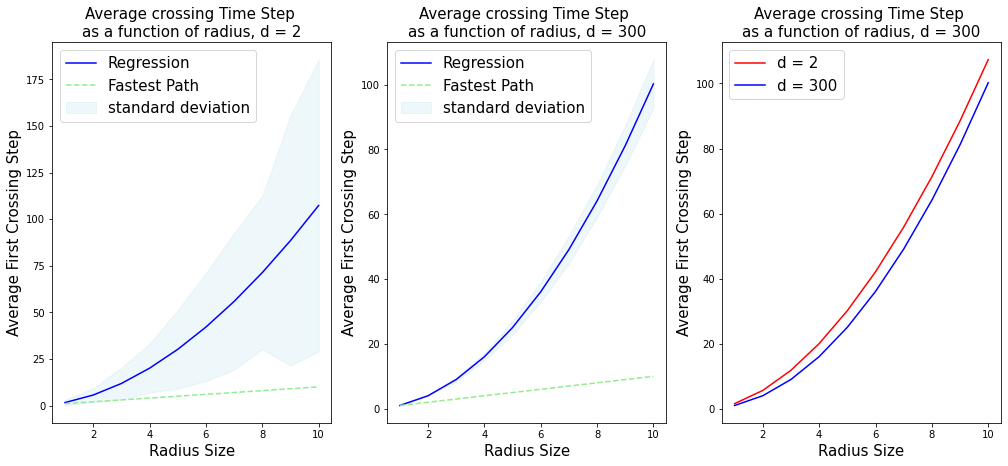

In [28]:
### Plot

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(7)
fig.set_figwidth(17)

ax1.plot(Rs, fit2, label = 'Regression', c = 'b')
ax1.plot(Rs, Rs, '--',label = 'Fastest Path', c = 'lightgreen')
ax1.fill_between(Rs, np.array(fit2) - np.array(std_2), np.array(fit2) + np.array(std_2), alpha=0.2, label ='standard deviation', color = 'lightblue')


ax2.plot(Rs, fit3, label = 'Regression', c = 'b', )
ax2.plot(Rs, Rs,'--', label = 'Fastest Path', c = 'lightgreen')
ax2.fill_between(Rs, np.array(fit3) - np.array(std_3), np.array(fit3) + np.array(std_3), alpha=0.2, label ='standard deviation', color= 'lightblue')

ax3.plot(Rs, fit2,  c = 'r', label = f'd = {d2}')
ax3.plot(Rs, fit3, c = 'b', label = f'd = {d3}')


ax1.legend(loc = 'upper left', fontsize = 15)
ax2.legend(loc = 'upper left', fontsize = 15)
ax3.legend(loc = 'upper left', fontsize = 15)

ax1.set_xlabel('Radius Size', fontsize = 15)
ax2.set_xlabel('Radius Size', fontsize = 15)
ax3.set_xlabel('Radius Size', fontsize = 15)

ax1.set_ylabel(f'Average First Crossing Step' , fontsize = 15)
ax2.set_ylabel(f'Average First Crossing Step' , fontsize = 15)
ax3.set_ylabel(f'Average First Crossing Step' , fontsize = 15)

ax1.set_title(f'Average crossing Time Step \nas a function of radius, d = {d2}', fontsize = 15)
ax2.set_title(f'Average crossing Time Step \nas a function of radius, d = {d3}', fontsize = 15)
ax3.set_title(f'Average crossing Time Step \nas a function of radius, d = {d3}', fontsize = 15)

print('We chose to take d =300 instead of d = 3 to reveal more clearly the differences in standard deviation between the \nresults.However, our analysis stands for d = 3 \n' )
print(f'for d = {d2}, M = {M},N = {N}, our linear regression coefficients are b = {b2_}, a = {a2_}')
print(f'for d = {d3}, M = {M},N = {N}, our linear regression coefficients are b = {b3_}, a = {a3_}')

plt.show()


## Write down your observations in a few sentences.

We can see that whatever the dimension considered, as the radius size increases, the average time for random walkers to cross a sphere with corresponding radius increases seemlingly according to the scaling law: $\bar{\tau} = bR^a$. 

However, we see an interesting difference in the uncertainty evolution when looking at different dimensions. In the leftmost plot, we can see that the standard deviation of our measurement increases dramatically with the radius size for low dimensions (here dimension 2 in left plot). Indeed, for a fixed number of time steps, a random walker in low dimensions has higher chances to see its components grow large than in high dimensions.

For example, let's consider a walker named A in 2D, and another one named B in 100D. At every iteration, each of A's components has a probability of $1/2$ of moving 1 step away from the origin. Whereas for walker B, that probability is of $1/100$. Indeed, the fastest way for each of these walkers to cross a sphere of radius $R$ would be such that at every step, they move in one same direction - so $R$ steps in total. The probability of that to happen is equal to $\frac{1}{2^R}$ and $\frac{1}{100^R}$ (since a walker chooses a random direction from a uniform probability distribution, each choice being independent from one to another) for walkers A and B respectively. Hence, we can assert that walkers in higher dimension will never cross a sphere of radius R in R steps with more certainty than for walkers in lower dimensions. In other words, the standard deviation about when walkers cross for the first time a sphere of given radius decreases as the dimension increases.  

This is shown in the left and center figures where the green line $f(R) = R$ associating to each radius size, the fastest time for a walker to cross a sphere of radius $R$ i.e $R$ steps. We can see that random walkers in dimension 2 can achieve this at several radius sizes, whereas this never happens at dimension 300. 


# Question 3: Metropolis Hasting Algorithm


Let's implement the Metropolis-Hastings algorithm to generate samples from a two-dimensional normal distribution with the mean at origin $\mu = [0,0]^T$ with standard deviation in both directions equal to 1: $\sigma_X = \sigma_Y = 1$, and correlation factor equal to $\rho$. The covariance matrix is hence : 
$\Sigma = \begin{bmatrix} 
	1 & \rho  \\
	\rho & 1 \\
	\end{bmatrix}$.

We have that our target distribution is
$\pi(x, y) = \frac{1}{2\pi \sqrt{(1 - \rho^2)}}\exp \left [ -\frac{1}{2\pi (1 - \rho^2)}(x^2 - 2\rho xy + y^2)\right] $. We form the following proposal distributions from two independent Cauchy distributions with median at the previous sample value and with a scale parameter $\gamma$ : $Q_1(x, x_0, \gamma) =  \frac{1}{\pi \gamma}\left [ \frac{\gamma^2}{(x-x_0)^2 + \gamma^2}\right ] $, $Q_2(y, y_0, \gamma) =  \frac{1}{\pi \gamma}\left [ \frac{\gamma^2}{(y-y_0)^2 + \gamma^2}\right ] $. We note that since the proposal cauchy distributions are symmetric, the acceptance rate becomes: $\pi (\vec{x_p})/\pi(\vec{x_{current}})$

In [29]:
def MH(max_iter, gamma, rho, Mu):
    t, x, y = 0, 0, 0
    Sx, Sy = [], []
    Sigma = np.array([[1, rho],[rho,1]])
    p = st.multivariate_normal.logpdf([0,0], mean = Mu, cov = Sigma)
    a, r, dx, dy = 0, 0, 0, 0
    Rx, Ry = [], []

    while True:
        Sx.append(x) 
        Sy.append(y)
        t += 1
        if t>=max_iter:
            break
        
        dx = cauchy.rvs(scale = gamma)
        dy = cauchy.rvs(scale = gamma)

        xp, yp = x + dx, y + dy

        pp = st.multivariate_normal.logpdf([xp, yp], mean = Mu, cov = Sigma)
        
        u = np.random.uniform(low=0.0, high=1.0, size = 1)

        if pp > p or pp >= np.log(u[0]) + p:
            x, y = xp, yp
            p = pp
            a += 1

        else:
            Rx.append(xp)
            Ry.append(yp)
            r += 1
    print(f"Rejection rate for \u03C1 = {rho}, \u03B3 = {gamma} is :", r/(a + r))
    return Sx, Sy, Rx, Ry, r/(a + r)

In [30]:
gamma1 = 0.85
gamma2 = 0.22
max_iter= 1000
rho1 = 0
rho2 = 0.99
Mu = np.array([0,0])
print('We chose gamma1 and gamma2 in order to have a rejection rate close to 0.7: \n')
Sx1, Sy1, Rx1, Ry1, R1 = MH(max_iter, gamma1, rho1, Mu )
Sx2, Sy2, Rx2, Ry2, R2 = MH(max_iter, gamma2, rho2, Mu )

We chose gamma1 and gamma2 in order to have a rejection rate close to 0.7: 

Rejection rate for ρ = 0, γ = 0.85 is : 0.6346346346346347
Rejection rate for ρ = 0.99, γ = 0.22 is : 0.7537537537537538


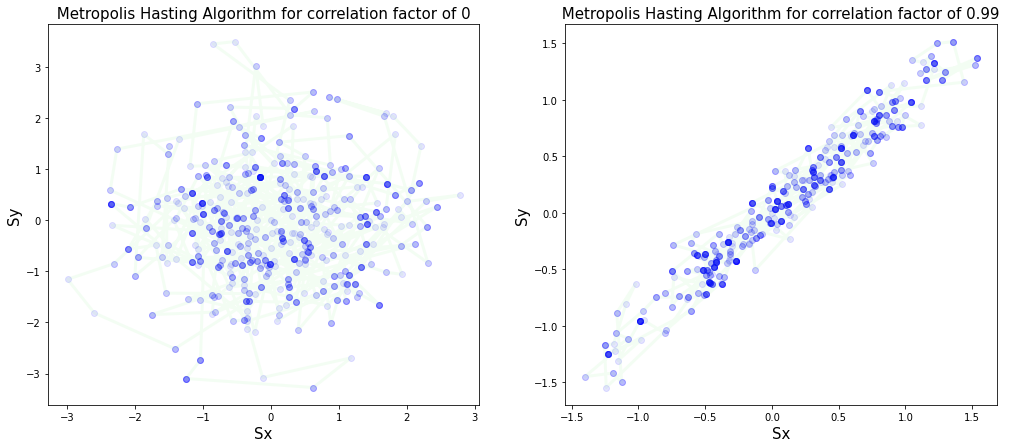

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(17) 

ax1.plot(Sx1, Sy1, alpha=0.1, c = 'lightgreen', lw=3)
ax2.plot(Sx2, Sy2, alpha=0.1, c = 'lightgreen', lw=3)
ax1.scatter(Sx1, Sy1, alpha=0.1, c = 'b')
ax2.scatter(Sx2, Sy2, alpha=0.1, c = 'b')

ax1.set_xlabel('Sx', fontsize = 15)
ax2.set_xlabel('Sx',fontsize = 15)

ax1.set_ylabel(f'Sy' , fontsize = 15)
ax2.set_ylabel(f'Sy' , fontsize = 15)

ax1.set_title(f' Metropolis Hasting Algorithm for correlation factor of {rho1} ', fontsize = 15)
ax2.set_title(f' Metropolis Hasting Algorithm for correlation factor of {rho2} ', fontsize = 15)
plt.show()

### Why do more samples overlap in the second run?

More samples overlap in the second run because the correlation factor is larger. Let us recall what $\rho$ represents. As it is the correlation factor, it is a measure of the linear correlation between two sets of data: here the x and y components of the proposed positions. Indeed, this makes sense as when $\rho \sim 1$, the data points would have to lie on a line, which is exactly what we recover in the second graph.   

Then, when the correlation factor is $\rho = 0$, i.e there is no correlation between the x, and y components of the proposed points, we have a chaotic relationship between the points composing the path followed by our agent throughout the metropolis hasting algorithm.